In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [177]:
df = pd.read_csv('dataset/goldstock.csv')
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [178]:
df.shape

(847, 2)

In [179]:
print(f"Date range of gold prices available from - {df.loc[:, 'Date'].iloc[0]} to {df.loc[:, 'Date'].iloc[-1]}")


Date range of gold prices available from - 1950-01 to 2020-07


In [180]:
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [181]:
df['month'] = date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [182]:
df

,Price
month,
1950-01-31,34.730
1950-02-28,34.730
1950-03-31,34.730
1950-04-30,34.730
1950-05-31,34.730
...,...
2020-03-31,1593.764
2020-04-30,1680.030
2020-05-31,1715.697


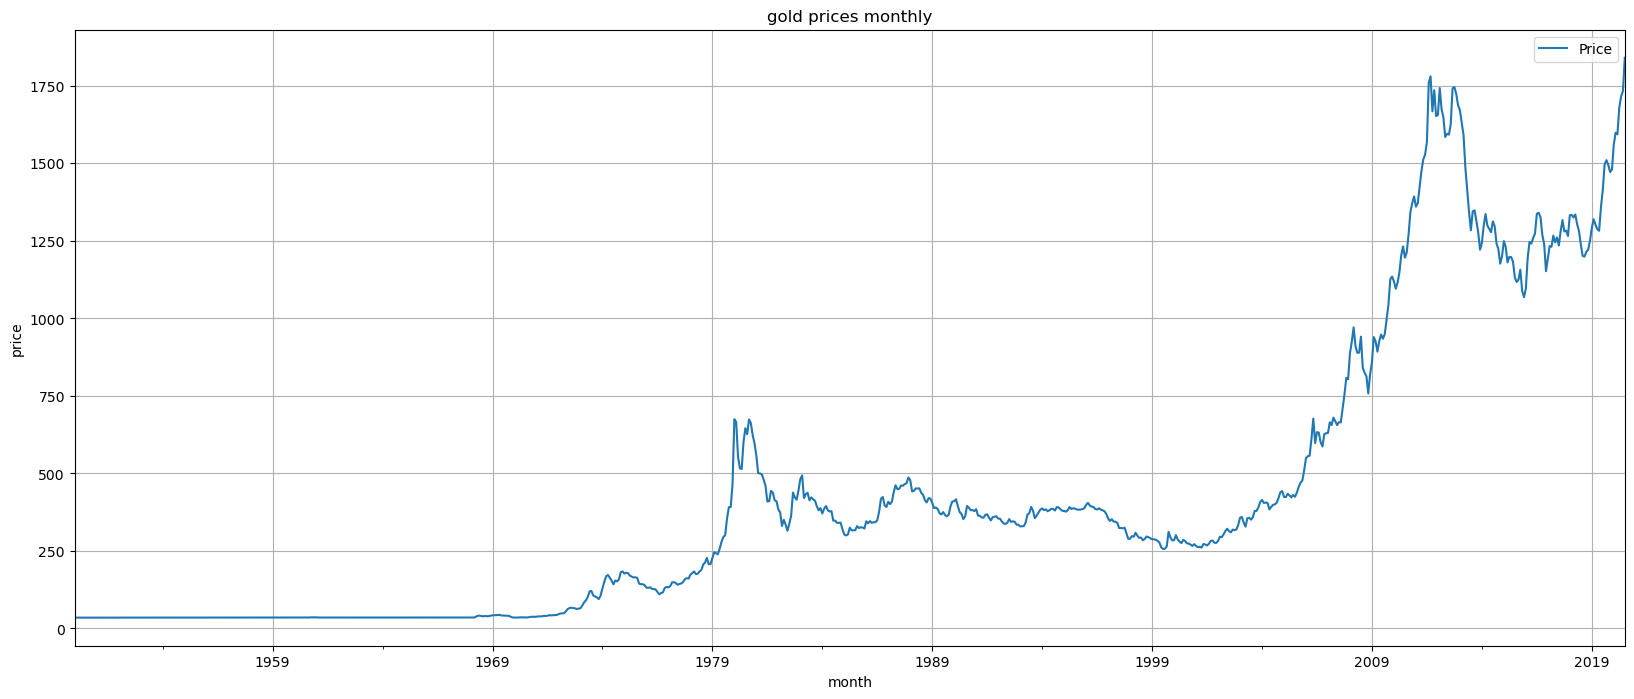

In [186]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly")
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

In [187]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


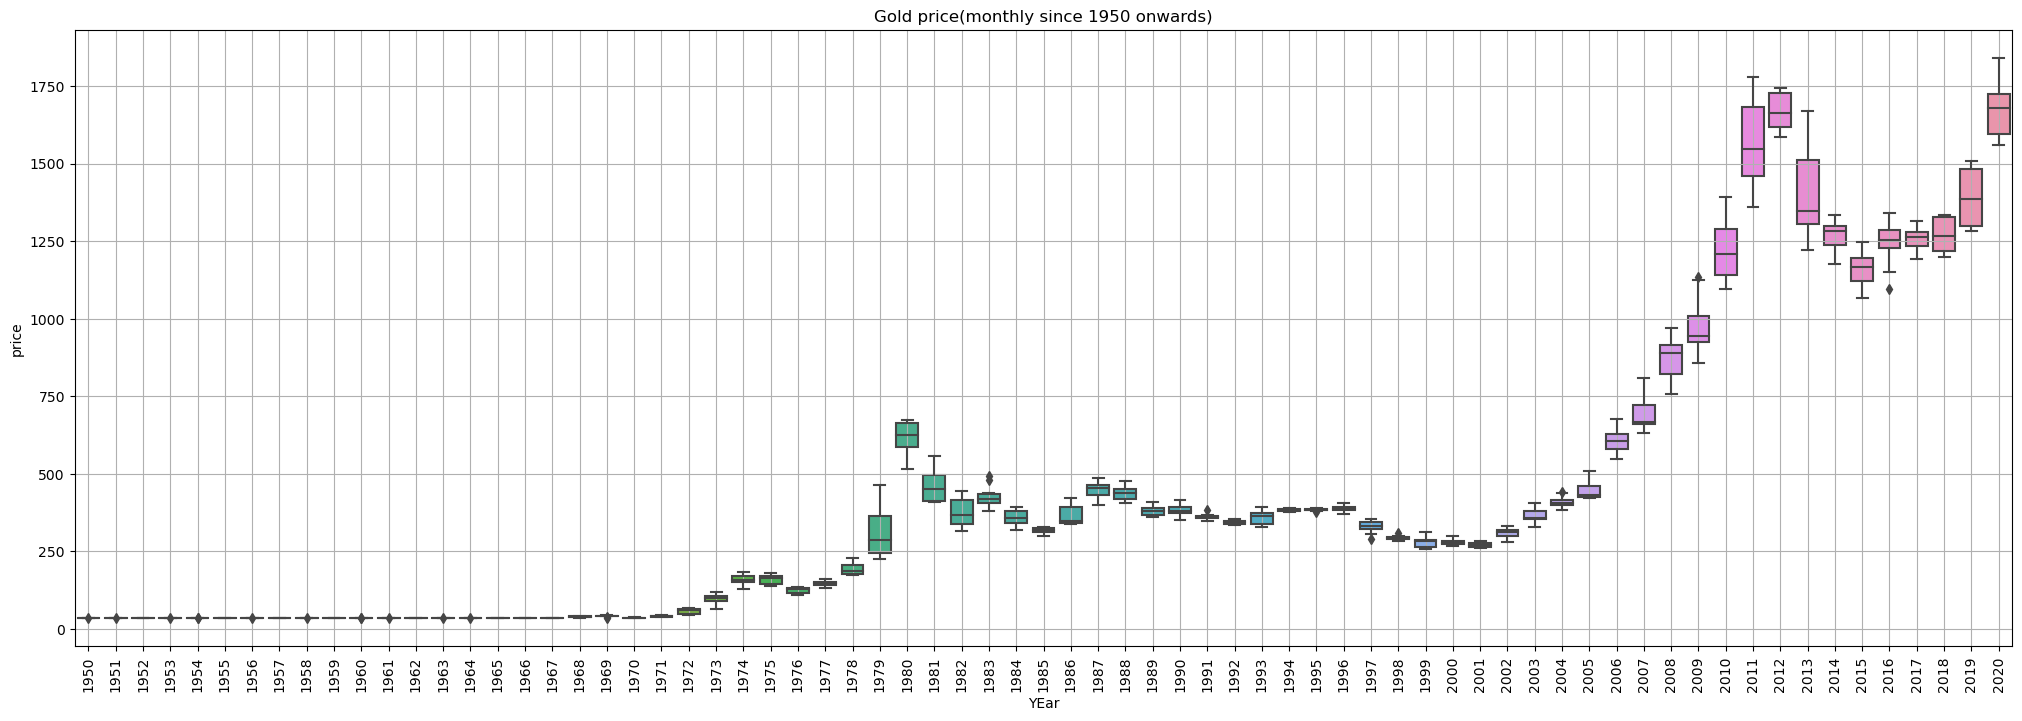

In [189]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y=df.values[:,0], ax = ax)
plt.title('Gold price(monthly since 1950 onwards)')
plt.xlabel('Year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()

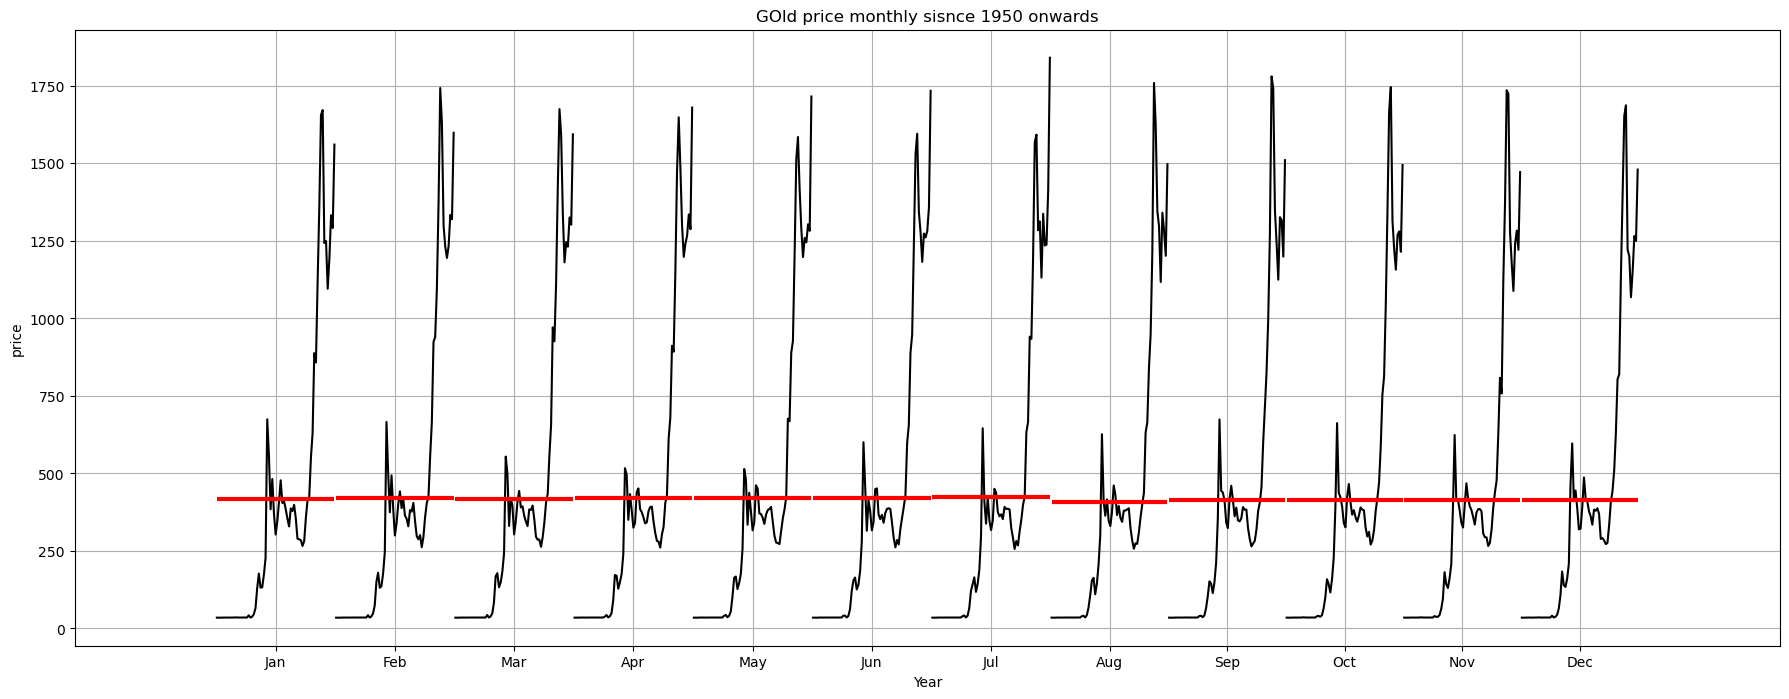

In [190]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (22,8))
month_plot(df, ylabel= 'gold price', ax = ax)
plt.title('GOld price monthly sisnce 1950 onwards')
plt.xlabel('Year')
plt.ylabel('price')
plt.grid()

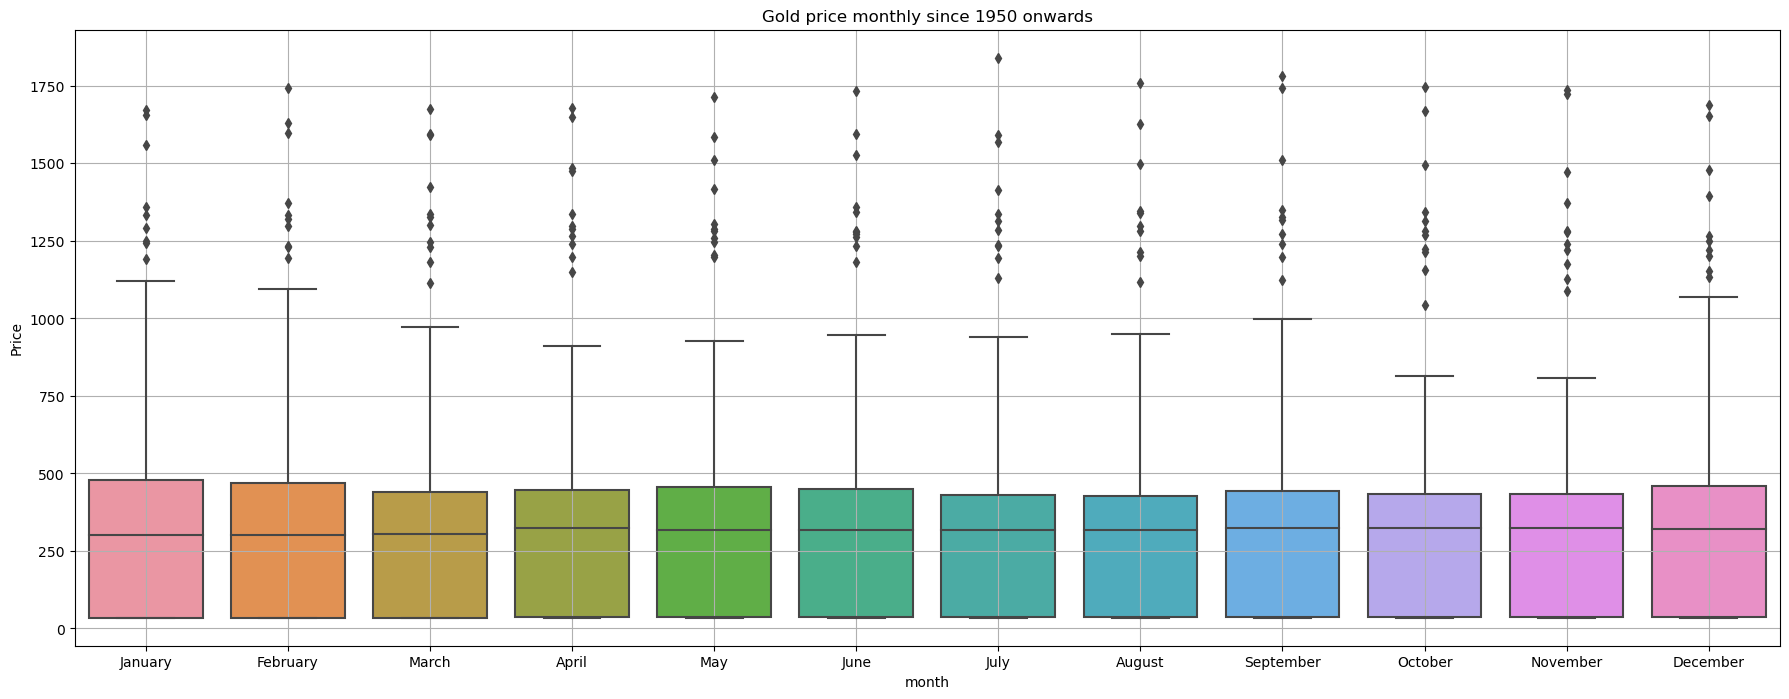

In [191]:
_, ax = plt.subplots(figsize= (22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax = ax)
plt.title('Gold price monthly since 1950 onwards')
plt.xlabel("month")
plt.ylabel('Price')
plt.grid()

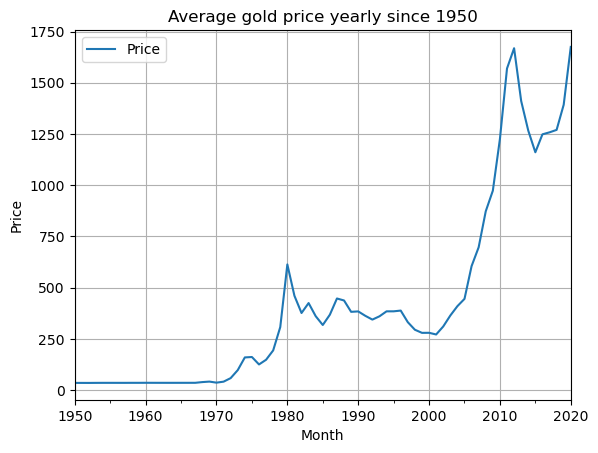

In [192]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Average gold price yearly since 1950')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

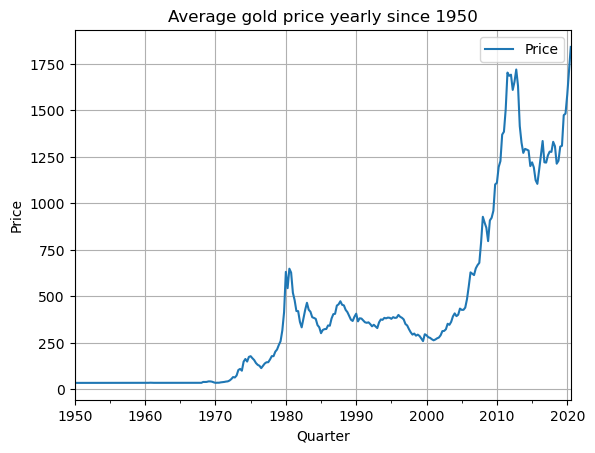

In [200]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title('Average gold price yearly since 1950')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()

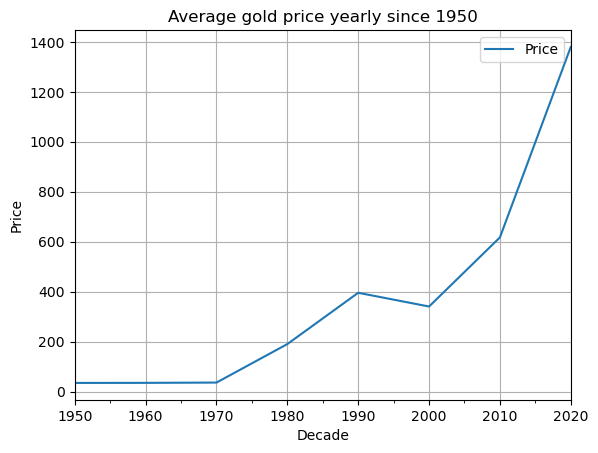

In [199]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Average gold price yearly since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()

In [202]:
# Calculate mean and standard deviation
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}), left_index=True, right_index=True)

# Calculate coefficient of variation percentage
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)

print(df_1.head())

            Mean       Std  Cov_pct
month                              
1950   34.729167  0.002887     0.01
1951   34.717500  0.020057     0.06
1952   34.628333  0.117538     0.34
1953   34.879167  0.056481     0.16
1954   35.020000  0.082792     0.24


In [203]:
df_1

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
...,...,...,...
2016,1248.161833,73.454098,5.88
2017,1257.848583,32.529524,2.59
2018,1269.852583,54.900304,4.32


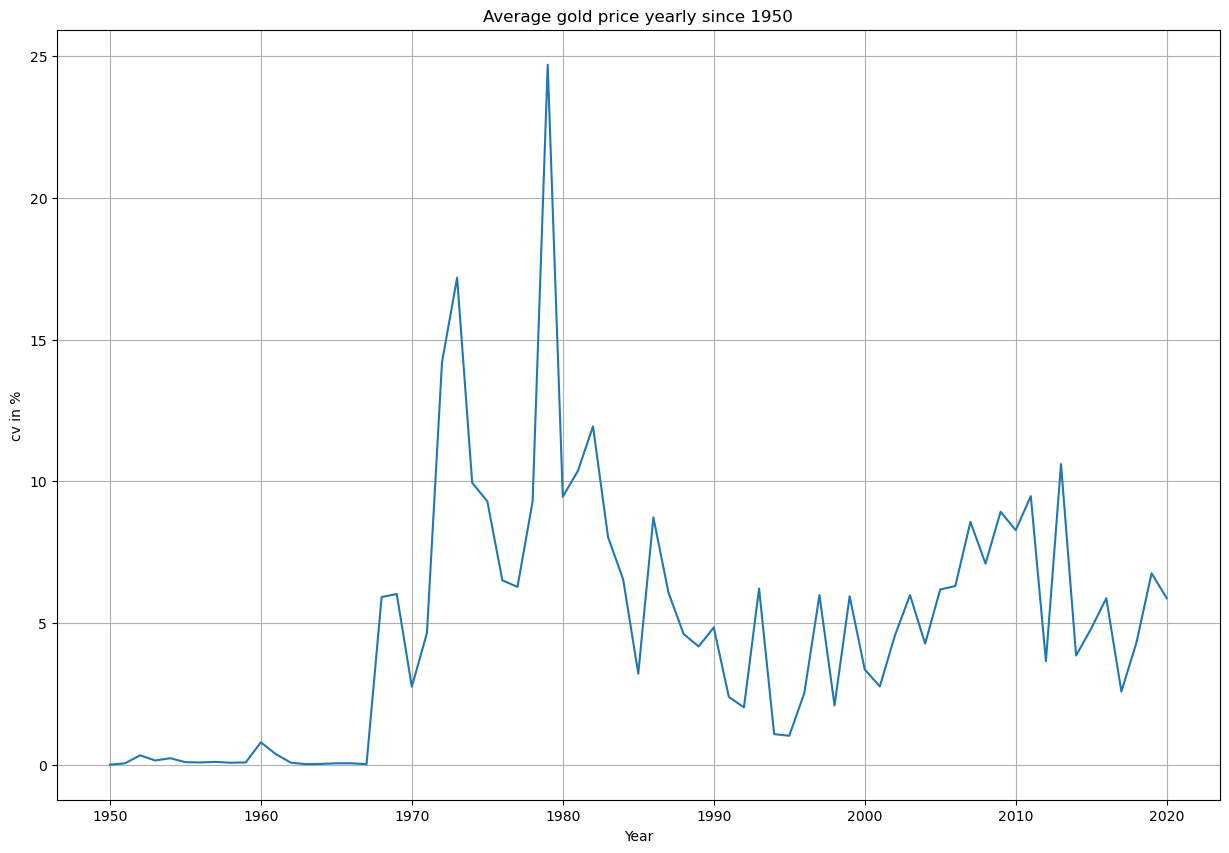

In [205]:
fig, ax = plt.subplots(figsize = (15,10))
df_1['Cov_pct'].plot();
plt.title('Average gold price yearly since 1950')
plt.xlabel("Year")
plt.ylabel('cv in %')
plt.grid()

# Building Time Series forcasting model

In [206]:
train = df[df.index.year <=2015]
test = df[df.index.year > 2015]

In [208]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


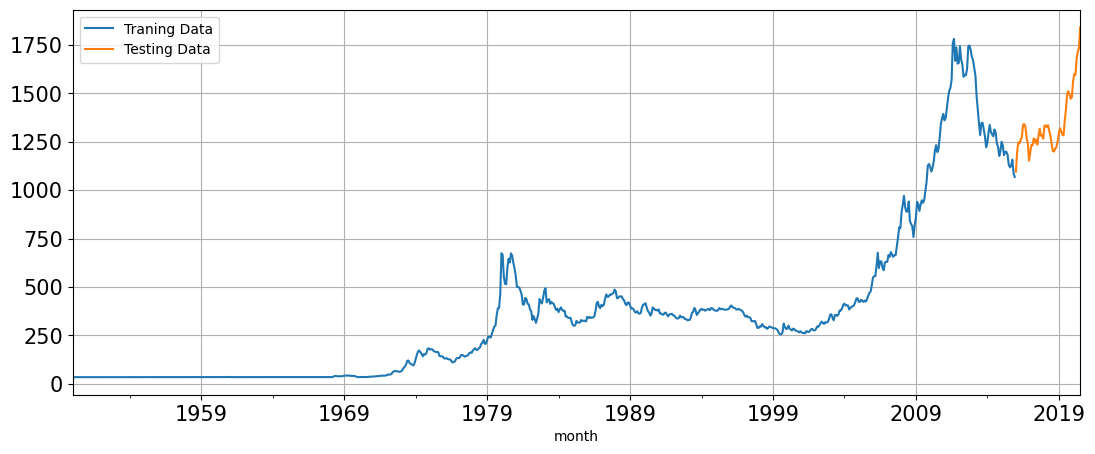

In [209]:
train["Price"].plot(figsize = (13,5), fontsize = 15)
test["Price"].plot(figsize = (13,5), fontsize = 15)
plt.grid()
plt.legend(['Traning Data', 'Testing Data'])
plt.show()

In [212]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [213]:
LR_train = train.copy()
LR_test = test.copy()

In [214]:
LR_train['time'] = train_time
LR_test['time'] = test_time


In [217]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

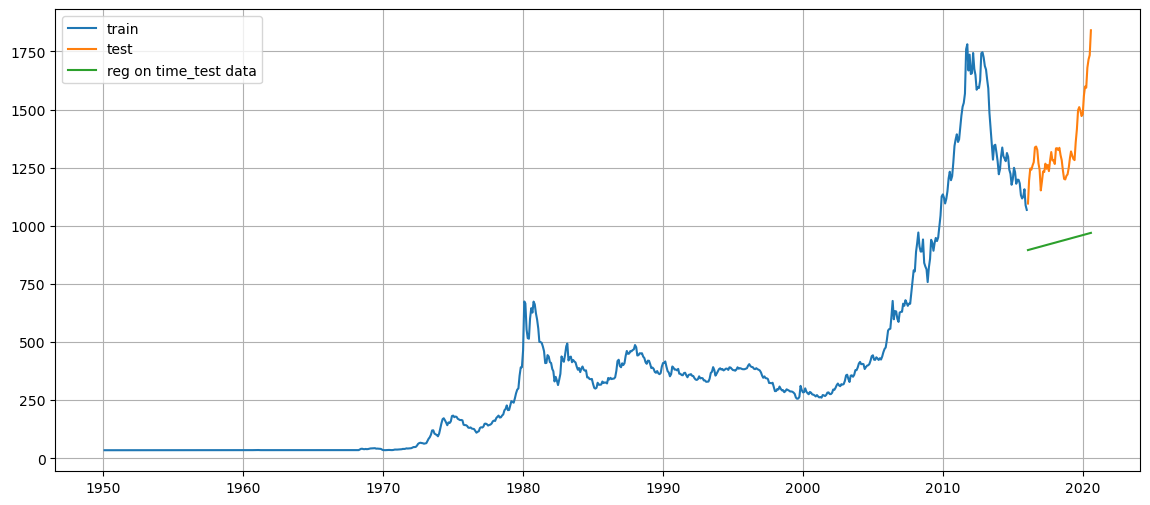

In [222]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forcast'] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test["Price"], label = 'test')
plt.plot(LR_test['forcast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid()


In [223]:
def mape(actual, pred):
    return round((np.mean(abs(actual-pred)/actual))*100, 2)

mape_model_test = mape(test['Price'].values, test_predictions_model1)
print("MAPE is %3.3f"%(mape_model_test),"%")

MAPE is 29.760 %


In [226]:
results = pd.DataFrame({'Test Mape (%)': [mape_model_test]}, index=["RecursionOnTime"])
results

,Test Mape (%)
RecursionOnTime,29.76


In [228]:
naive_train = train.copy()
naive_test = test.copy()


In [229]:
naive_test['naive'] = np.array(train['Price'])[len(np.array(train['Price']))-1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

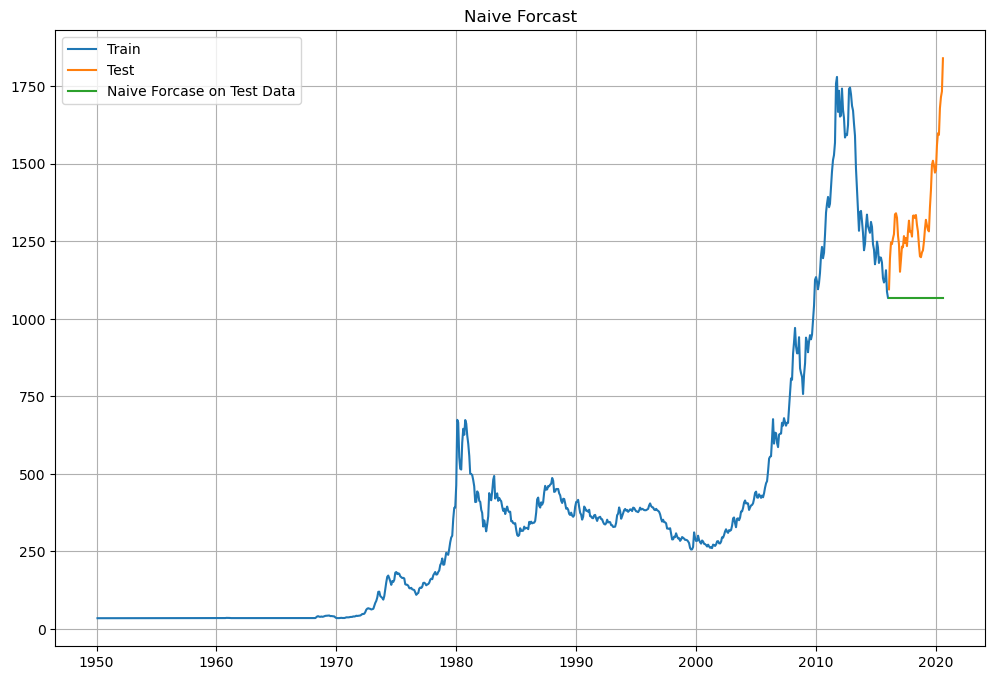

In [230]:
plt.figure(figsize=(12,8))
plt.plot(naive_train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(naive_test['naive'], label='Naive Forcase on Test Data')
plt.legend(loc='best')
plt.title('Naive Forcast')
plt.grid()

In [231]:
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print("For Naive forcast on the Test Data, MAPE is %3.3f"%(mape_model2_test),"%")

For Naive forcast on the Test Data, MAPE is 19.380 %


In [233]:
resultsDf_2 = pd.DataFrame({'Test Mape (%)': [mape_model2_test]}, index=['NaiveModel'])
results = pd.concat([results, resultsDf_2])
results

,Test Mape (%)
RecursionOnTime,29.76
NaiveModel,19.38


In [239]:
final_model = ExponentialSmoothing(df,
                                   trend= 'additive',
                                   seasonal= 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)
                                   


In [240]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("Mape:", Mape_final_model)

Mape: 17.24


In [242]:
prediction = final_model.forecast(steps = len(test))

In [243]:
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof=1),
                        'prediction': prediction,
                        'upper_CI': prediction + 1.96*np.std(final_model.resid,ddof=1)})

pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.716748,1792.867721,1901.018694
2020-09-30,1615.298179,1723.449152,1831.600125
2020-10-31,1538.554867,1646.705839,1754.856812
2020-11-30,1476.740491,1584.891463,1693.042436
2020-12-31,1459.304892,1567.455865,1675.606837


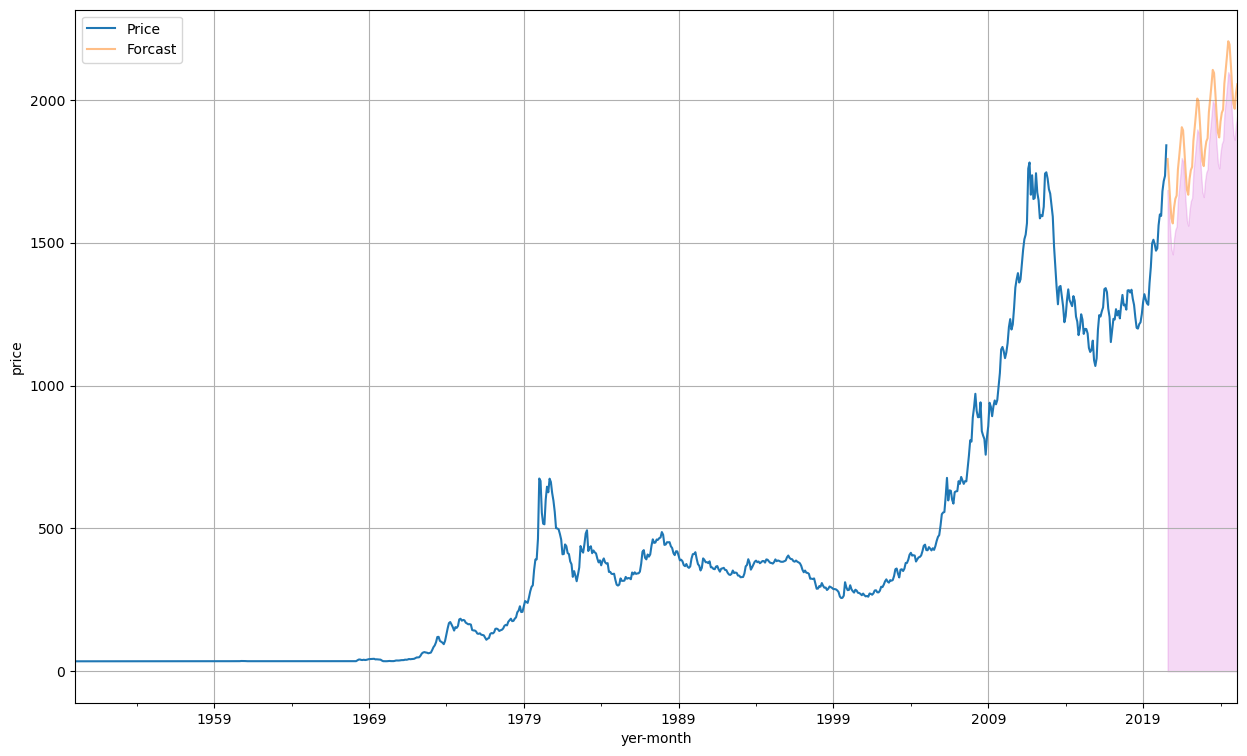

In [245]:
axis = df.plot(label = 'Actual', figsize = (15,9))
pred_df['prediction'].plot(ax = axis, label= 'Forcast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], color = 'm', alpha = .15)
axis.set_xlabel('yer-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()
